## OpenCV vs Tensorflow image processing difference

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

print(tf.__version__)
image_path = 'data/example.jpg'

def plt_display(image, title):
    fig = plt.figure()
    a = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(image)
    a.set_title(title)

1.14.0


### Read image comparison

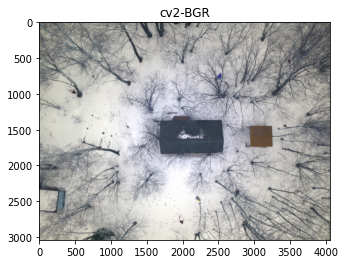

In [28]:
image_cv = cv2.imread(image_path)
plt_display(image_cv, 'cv2-BGR')

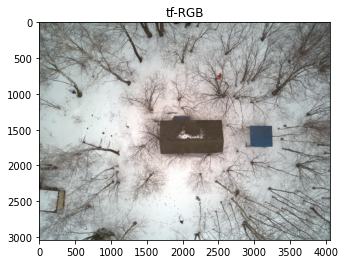

In [29]:
file_reader = tf.io.read_file(image_path)
jpeg_decoder = tf.image.decode_jpeg(file_reader, channels=3)
with tf.Session() as sess:
    image_tf = jpeg_decoder.eval()
plt_display(image_tf, 'tf-RGB')

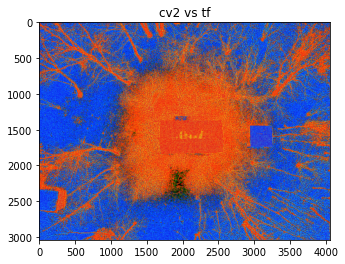

In [30]:
image_diff = np.abs(image_cv - image_tf)
plt_display(image_diff, 'cv2 vs tf')

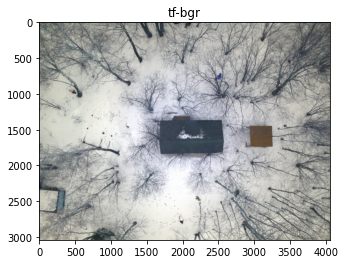

In [31]:
image_tf_bgr = image_tf[:, :, ::-1]
plt_display(image_tf_bgr, 'tf-bgr')

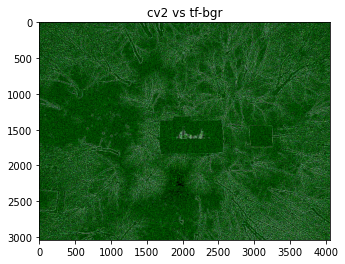

In [32]:
image_diff = np.abs(image_cv - image_tf_bgr)
plt_display(image_diff, 'cv2 vs tf-bgr')

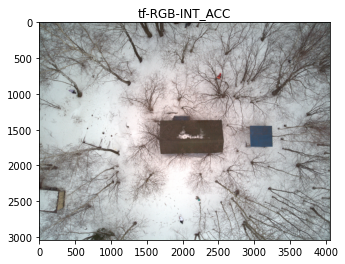

In [33]:
file_reader = tf.io.read_file(image_path)
jpeg_decoder = tf.image.decode_jpeg(file_reader, channels=3, dct_method='INTEGER_ACCURATE')
with tf.Session() as sess:
    image_tf = jpeg_decoder.eval()
plt_display(image_tf, 'tf-RGB-INT_ACC')

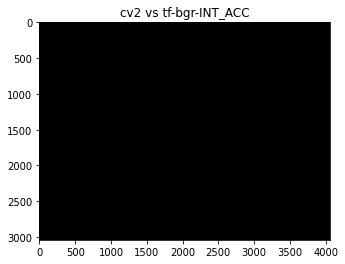

In [34]:
image_tf_bgr = image_tf[:, :, ::-1]
image_diff = np.abs(image_cv - image_tf_bgr)
plt_display(image_diff, 'cv2 vs tf-bgr-INT_ACC')

### Reize image comparison

image shape before resize: (3040, 4056, 3)
image shape after resize: (300, 300, 3)
image dtype:  uint8


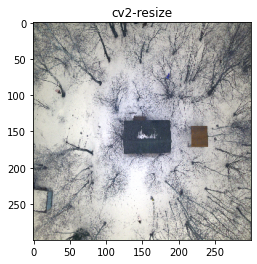

In [35]:
print("image shape before resize:", image_cv.shape)
image_cv_resized = cv2.resize(image_cv,(300,300))
print("image shape after resize:", image_cv_resized.shape)
print("image dtype: ", image_cv_resized.dtype)
plt_display(image_cv_resized, 'cv2-resize')

image shape before resize: (3040, 4056, 3)
image shape after resize: (300, 300, 3)
image dtype:  uint8


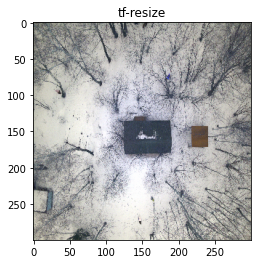

In [36]:
print("image shape before resize:", image_tf_bgr.shape)

image_tf_4d = tf.expand_dims(image_tf_bgr, 0)
image_tf_resized_4d = tf.image.resize_bilinear(image_tf_4d, (300,300))
image_tf_resized = tf.squeeze(image_tf_resized_4d)

with tf.Session() as sess:
    image_tf_resized = image_tf_resized.eval()

print("image shape after resize:", image_tf_resized.shape)
image_tf_resized = image_tf_resized.astype(np.uint8)
print("image dtype: ", image_tf_resized.dtype)

plt_display(image_tf_resized, 'tf-resize')

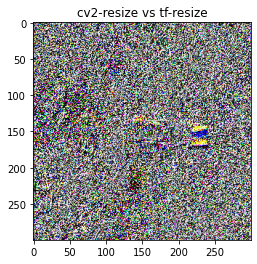

In [37]:
image_resized_diff = np.abs(image_cv_resized - image_tf_resized)
plt_display(image_resized_diff, 'cv2-resize vs tf-resize')

image shape before resize: (3040, 4056, 3)
image shape after resize: (300, 300, 3)
image dtype:  uint8


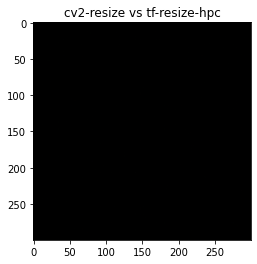

In [38]:
print("image shape before resize:", image_tf_bgr.shape)

image_tf_4d = tf.expand_dims(image_tf_bgr, 0)
image_tf_resized_4d = tf.image.resize_bilinear(image_tf_4d, (300,300), half_pixel_centers=True)
image_tf_resized_hpc = tf.squeeze(image_tf_resized_4d)

with tf.Session() as sess:
    image_tf_resized_hpc = image_tf_resized_hpc.eval()

print("image shape after resize:", image_tf_resized_hpc.shape)
image_tf_resized_hpc = image_tf_resized_hpc.astype(np.uint8)
print("image dtype: ", image_tf_resized_hpc.dtype)

image_resized_diff = np.abs(image_cv_resized - image_tf_resized_hpc)
plt_display(image_resized_diff, 'cv2-resize vs tf-resize-hpc')